# Dados do projeto

**Aluna:** Ludmilla Oliveira Soares

**Data:** 18/09/2025

**Registro acadêmico:** 4052025001247

**Dataset:** [Study Smart](https://www.kaggle.com/datasets/sumedh1507/student-study-habits-dataset)



# Escopo do projeto

O problema foi selecionado para avaliar a correlação entre fatores como horas de sono, tempo de tela, níveis de estresse e envolvimento parental, influenciam no sucesso acadêmico do índivíduo .

**Tipo de tarefa:** Tarefa de regressão

**Área de aplicação:** Data mining

**Valor para o cliente:** auxílio na avaliação de como fatores externos podem impactar no sucesso acadêmico

# Bibliotecas utilizadas


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importar dados do CSV/Github

In [ ]:
url = 'https://raw.githubusercontent.com/lud-oliv/MVP-Machine-Leaning/main/student_study_habits.csv'

In [ ]:
base_dados = pd.read_csv(url)

In [ ]:
# Informacoes dos dados presentes no dataset

print("\nInformações sobre o dataset:")
print(base_dados.info())


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_t

In [ ]:
# Descrição dos principais valores referentes ao target

base_dados['final_grade'].describe()

,final_grade
count,500.000000
mean,63.753071
std,7.114183
min,40.200403
25%,58.813933
50%,63.822553
75%,68.588277
max,92.007807


## Gráficos exploratórios

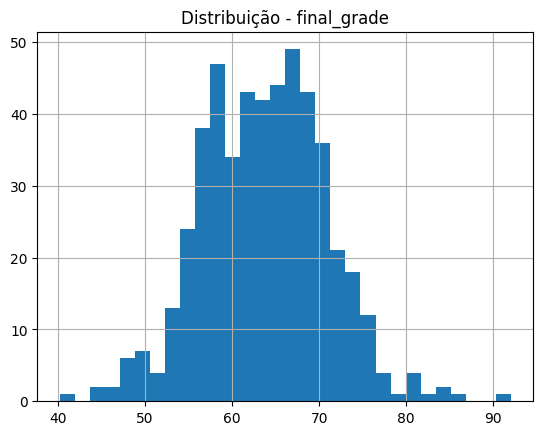

In [ ]:
# Histograma

_ = base_dados["final_grade"].hist(bins=30)
plt.title("Distribuição - final_grade")
plt.show()

# Preparação dos dados

In [ ]:
# Definição da variável preditora X

X = base_dados.drop('final_grade', axis=1)

In [ ]:
# Definição da variável alvo y

y = base_dados['final_grade']

In [ ]:
# Divisão dos dados : 80% para treinamento e 20% para os testes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Dados da divisão dos dados para confirmação

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de teste (y_test): {y_test.shape}")

Tamanho do conjunto de treino (X_train): (400, 12)
Tamanho do conjunto de teste (X_test): (100, 12)
Tamanho do conjunto de treino (y_train): (400,)
Tamanho do conjunto de teste (y_test): (100,)


# Tratemento de dados e pipeline de pré-processamento

In [ ]:
# Criar o pipeline de pré-processamento

preprocessing_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
# Ajustar o pipeline apenas com os dados de treino pra evitar vasamento

X_train_processed = preprocessing_pipeline.fit_transform(X_train)


In [ ]:
# Transformar os dados de teste também usando o pipeline

X_test_processed = preprocessing_pipeline.transform(X_test)


In [ ]:
# Exibição dos dados após o pré-processamento

print("Dados de treino processados (5 primeiras linhas):")
print(pd.DataFrame(X_train_processed, columns=X_train.columns).head())

Dados de treino processados (5 primeiras linhas):
   study_hours_per_week  sleep_hours_per_day  attendance_percentage  \
0              0.410029            -1.486291              -1.681933   
1              0.728885            -2.316119              -0.645861   
2             -1.443862             0.774420               0.426875   
3             -0.837812             2.395549              -0.099953   
4              0.074221            -1.064622              -0.252192   

   assignments_completed  participation_level_Low  participation_level_Medium  \
0               0.066277                 2.031798                   -0.985111   
1              -0.335404                -0.492175                    1.015114   
2               0.066277                -0.492175                    1.015114   
3              -1.540449                -0.492175                    1.015114   
4               0.467959                -0.492175                    1.015114   

   internet_access_Yes  parental_edu

# Baseline e modelos candidatos

### Modelo baseline: Regressão linear

In [ ]:
# Instancia do modelo

linear_reg_model = LinearRegression()

# Treinamento do modelo com os dados processados

linear_reg_model.fit(X_train_processed, y_train)

LinearRegression()

### Modelo candidato: KNN Regressor

In [ ]:
# Instancia do modelo

knn_reg_model = KNeighborsRegressor(n_neighbors=3)

# Treinamento do modelo com os dados processados

knn_reg_model.fit(X_train_processed, y_train)



KNeighborsRegressor(n_neighbors=3)

### Previsão dos dados de teste para ambos os modelos

In [ ]:
linear_reg_predictions = linear_reg_model.predict(X_test_processed)
knn_reg_predictions = knn_reg_model.predict(X_test_processed)

In [ ]:
# Previsão dos 5 primeiros dados usando a regressão linear

print(f"Previsões da Regressão Linear (primeiras 5): {linear_reg_predictions[:5]}")


Previsões da Regressão Linear (primeiras 5): [62.64961363 62.63455287 76.46316402 57.17283259 66.91571336]


In [ ]:
# Previsão dos 5 primeiros dados usando o KNN regressor

print(f"Previsões do KNN (primeiras 5): {knn_reg_predictions[:5]}")


Previsões do KNN (primeiras 5): [66.45470784 62.87094559 68.42691204 57.68033718 62.18631369]


In [ ]:
# Valores reais dos conjuntos de teste

print(f"Valores reais do conjunto de teste (primeiras 5): {y_test.values[:5]}")


Valores reais do conjunto de teste (primeiras 5): [64.90931445 63.83000001 74.74957401 57.65130442 64.93537836]


# Avaliação rápida dos modelos

**MSE** (Erro quadrático médio) -> média dos erros ao quadrado

**RMSE** (Raiz do erro quadrático médio) -> raiz quadrática do MSE, está na mesma unidade da final_grade

**R² Score** -> variância da nota final que popde ser prevista pelas variáveis preditoras, variando de 0 a 1, quanto mais próximo de 1 melhor o modelo se ajusta ao conjunto de dados

### Avaliação da regressão linear

In [ ]:
mse_linear = mean_squared_error(y_test, linear_reg_predictions)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, linear_reg_predictions)

print(f"Erro Quadrático Médio (MSE): {mse_linear:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")

Erro Quadrático Médio (MSE): 10.32
Raiz do Erro Quadrático Médio (RMSE): 3.21
R² Score: 0.82


### Avaliação do KNN regressor

In [ ]:
mse_knn = mean_squared_error(y_test, knn_reg_predictions)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_reg_predictions)

print(f"Erro Quadrático Médio (MSE): {mse_knn:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

Erro Quadrático Médio (MSE): 27.31
Raiz do Erro Quadrático Médio (RMSE): 5.23
R² Score: 0.52


# Validação e otimização dos hiperparâmetros

Será aplicada somente ao modelo KNN regressor:

### Definição dos hiperparâmetros para otimização

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1, 10), # Testar de 1 a 9 vizinhos
    'weights': ['uniform', 'distance']
}

### Configuração da validação cruzada usando KFold

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

### Executar a Gridsearch

In [ ]:
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Usamos MSE negativo porque GridSearchCV maximiza o score
    cv=cv,
    n_jobs=-1 # Usa todos os núcleos da CPU para acelerar o processo
)

# Ajustar a grid search nos dados de treino

grid_search.fit(X_train_processed, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

### Exibição dos melhores hiperparâmetros e score

In [ ]:
print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)
print(f"Melhor RMSE na validação cruzada: {best_rmse:.2f}")


Melhores hiperparâmetros encontrados: {'n_neighbors': np.int64(6), 'weights': 'distance'}
Melhor RMSE na validação cruzada: 4.71


# Avaliação final

### Modelo de baseline: Regressão linear


In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_processed, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test_processed)

### Modelo candidato : KNN regressor otimizado

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform', 'distance']}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1
)
grid_search.fit(X_train_processed, y_train)
best_knn_model = grid_search.best_estimator_
best_knn_predictions = best_knn_model.predict(X_test_processed)

### Avaliação de ambos os modelos

In [ ]:
# Regressão linear

mse_linear = mean_squared_error(y_test, linear_reg_predictions)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, linear_reg_predictions)
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")

MSE: 10.3192
RMSE: 3.2124
R² Score: 0.8168


In [ ]:
# KNN regressor otimizado

mse_knn = mean_squared_error(y_test, best_knn_predictions)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, best_knn_predictions)
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

MSE: 27.1943
RMSE: 5.2148
R² Score: 0.5172


### Gráfico de resíduos

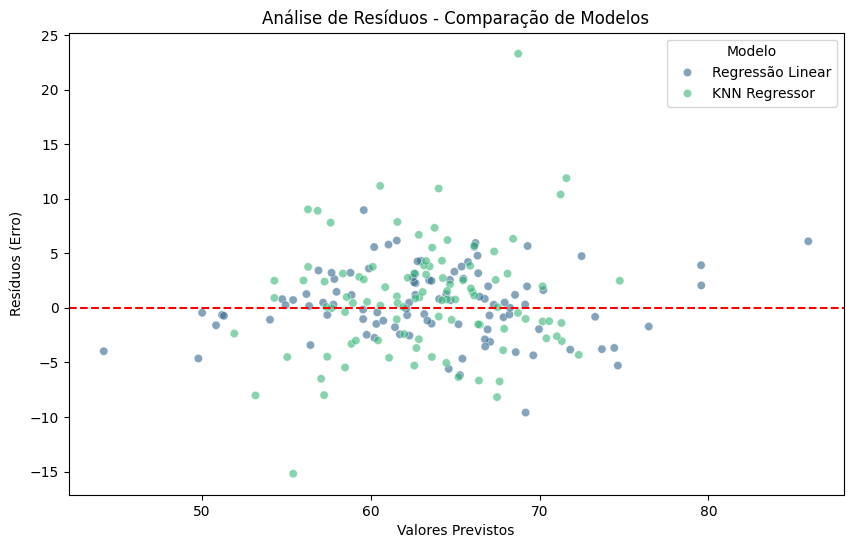

In [ ]:
# residuos de cada de modelo

linear_reg_residuals = y_test - linear_reg_predictions
knn_reg_residuals = y_test - knn_reg_predictions

# dataframe pro grafico
plot_df = pd.DataFrame({
    'Modelo': ['Regressão Linear'] * len(y_test) + ['KNN Regressor'] * len(y_test),
    'Valores Previstos': np.concatenate([linear_reg_predictions, knn_reg_predictions]),
    'Resíduos': np.concatenate([linear_reg_residuals, knn_reg_residuals])
})

#grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='Valores Previstos',
    y='Resíduos',
    hue='Modelo',
    alpha=0.6,
    palette='viridis'
)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Análise de Resíduos - Comparação de Modelos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos (Erro)")
plt.legend(title='Modelo')
plt.show()

# Conclusão




Após todas as etapas realizadas, desde a inserção dos dados até o graáfico de resíduos, foram aplicados métodos de Machine Learning por meio da biblioteca sklearn, também usando as bibliotecas numpy, matplotlib,seaborn e pandas.

Dentre as duas formas de análise de dados proposta para o problema de regressão, de acordo com os parâmetros R² Score, MSE e RMSE, os melhores resultados encontrados foram para a regressão linear em detrimento do KNN, mesmo após a otimização feita.

Acredito que o que poderia ser modificado no dataset, seriam os parâmetros apresentados, poderiam ter fatores como idade, sexo, educação pública ou particular, que poderiam afetar o resultado, não acredito que o tamanho da amostra modificaria os resultados encontrados tanto quanto o acréscimo de outras informações.

Já com relação ao gráfico de resíduos, retomando os parâmetros apresentados, ele confirma a análise de que o melhor modelo foi a regressão linear, tendo em vista que os dados apresentados por esse modelo estão mais próximos da linha de base, ou do valor 0. Enquanto os valores do KNN estão mais dispersos no gráfico e menos concentrados perto da linha de base.

Sobre o modelo, ele seria possível sim de ser usado em outra escola ou até mesmo com outros parâmetros, desde que tenha a informação da nota,que foi a variável alvo.

